In [28]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

#### input vectors

* u_states[0] = previous input of 1st section
* u_states[1] = current input of 1st section
* u_states[2] = previous input of 2nd section
* u_states[3] = current inputt of 2nd section
* u_states[4] = previous input of 3rd section
* u_states[5] = current input of 3rd section

#### output vectors

* y_states[0] = previous output of 1st section
* y_states[1] = current output of 1st section
* y_states[2] = previous output of 2nd section
* y_states[3] = current output of 2nd section
* y_states[4] = previous output of 3rd section
* y_states[5] = current output of 3rd section

In [29]:
def lag3(a,b,T, u, u_states, y_states):
    for k in range(3):
        y_states[2*k] = y_states[2*k+1]
        u_states[2*k] = u_states[2*k+1]
        if k == 0:
            u_states[2*k+1] = u
        else:
            u_states[2*k+1] = y_states[2*k-1]
        y_states[2*k+1] = (1/a)*(-b*y_states[2*k]+T*(u_states[2*k+1]+u_states[2*k]))
    return y_states[5]
                                 
    

In [30]:
# lag3 simulation function
def lag3sim(uvec, tvec):
    yvec = np.zeros(tvec.shape)
    T = tvec[1] - tvec[0]
    a = 2 + T
    b = T - 2
    u_states = np.zeros((6,1))
    y_states = np.zeros((6,1))
    for i in range(len(tvec)):
        yvec[i] = lag3(a,b,T, uvec[i], u_states, y_states)
    return yvec


Compare the result

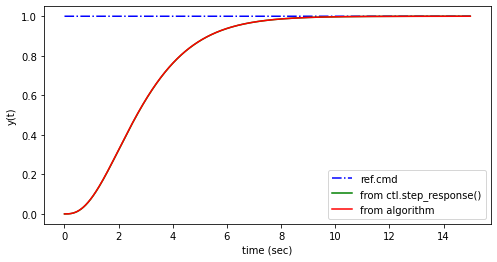

In [31]:
s = ctl.tf('s')
P = 1/(s+1)**3
tvec = np.arange(0,15,0.01)
uvec = np.ones(tvec.shape)
tout, y1 = ctl.step_response(P, tvec)
y2 = lag3sim(uvec, tvec)
plt.figure(figsize=(8,4))
plt.plot(tvec,uvec,'b-.',tvec,y1,'g-',tvec,y2,'r-')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.legend(['ref.cmd','from ctl.step_response()','from algorithm'])
plt.show()

In [ ]:
uvec[0]

In [ ]:
T = tvec[1]-tvec[0]
T